In [1]:
# Import required packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

pitches = pd.read_csv('/Users/JKovach/Downloads/mlb-pitch-data-20152018/pitches.csv')

# Drop irrelevant columns, note: dropping y0 as by value should always be 50
pitches = pitches.drop(['event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs', 'y0', 'code',
                        'on_1b', 'on_2b', 'on_3b'],1)

# Reduce length by factor of 10 to increase performance, nan < 1% of values, drop nan
pitch_sample = pitches.sample(frac=.1, replace=True, random_state=0)
pitch_sample = pitch_sample.dropna(how='any')

#Numerical encoding for string type variables
num = LabelEncoder()
pitch_sample['n_pitch_type'] = num.fit_transform(pitch_sample['pitch_type'].astype('str'))
pitch_sample['n_type'] = num.fit_transform(pitch_sample['type'].astype('str'))
pitch_sample = pitch_sample.drop(['pitch_type', 'type'], 1)

pitch_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285259 entries, 305711 to 85158
Data columns (total 29 columns):
px                 285259 non-null float64
pz                 285259 non-null float64
start_speed        285259 non-null float64
end_speed          285259 non-null float64
spin_rate          285259 non-null float64
spin_dir           285259 non-null float64
break_angle        285259 non-null float64
break_length       285259 non-null float64
break_y            285259 non-null float64
ax                 285259 non-null float64
ay                 285259 non-null float64
az                 285259 non-null float64
sz_bot             285259 non-null float64
sz_top             285259 non-null float64
type_confidence    285259 non-null float64
vx0                285259 non-null float64
vy0                285259 non-null float64
vz0                285259 non-null float64
x                  285259 non-null float64
x0                 285259 non-null float64
y                  285259

Column Definitions - Column information from kaggle dataset (https://www.kaggle.com/pschale/mlb-pitch-data-20152018#pitches.csv), Columns with asterisks are defined by statcast definitions found at https://baseballsavant.mlb.com/csv-docs. Some definitions modified for clarity by me. Additional clarity can be found at https://trackman.zendesk.com/hc/en-us/articles/115002776647-Radar-Measurement-Glossary-of-Terms

1. px: x-location as pitch crosses the plate. X=0 means right down the middle
2. pz: z-location as pitch crosses the plate. Z=0 means the ground
3. start_speed: Speed of the pitch upon release by the pitcher (as it's thrown)
4. end_speed: Speed of the pitch when it crosses the front edge of the plate
5. spin_rate: The pitch's spin rate, measure in RPM
6. spin_dir: Direction in which pitch is spinning, measured in degrees (assuming 0 is the vector directly between the center of the mound and the center of home plate).
7. *break_angle: (None, deprecated from pre-statcast system, assuming 0 is vertical, angle of vector over break) 
8. *break_length: (None, deprecated from pre-statcast system, magnitude of break vector)
9. *break_y:
10. *ax: The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet.
11. *ay: The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.
12. *az: The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.
13. *sz_bot: Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.
14. *sz_top: Top of the batter's strike zone set by the operator when the ball is halfway to the plate.
15. type_confidence: Confidence in pitch_type classification. Goes up to 2 for some reason.
16. *vx0: The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet.
17. *vy0: The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet.
18. *vz0: The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet.
19. x
20. x0
21. y
22. y0
23. z0
24. *pfx_x: Horizontal movement in feet from the catcher's perspective.
25. *pfx_z: Vertical movement in feet from the catcher's perspective.
26. nasty
27. *zone: Zone location of the ball when it crosses the plate from the catcher's perspective. 1-9 are in zone, left to right, then high to low. 11 is up and left of the zone, 12 is up and right of the zone, 13 and 14 are same for low
28. code: Records the result of the pitch. See dataset description for list of codes and their meaning
29. type: Simplified code, S (strike) B (ball) or X (in play)
30. pitch_type: Type of pitch. See dataset description for list of pitch types
31. event_num: event number, used for finding when exactly ejections happen.
32. b_score: score for the batter's team
33. ab_id: at-bat ID. Matches up with atbats.csv
34. b_count: balls in the current count
35. s_count: strikes in the current count
36. outsnumber of outs (before pitch is thrown)
37. pitch_num: pitch number (of at-bat)
38. on_1b: True if there's a runner on first, False if empty
39. on_2b: True if there's a runner on second, False if empty
40. on_3b: I don't know (/s. True if there's a runner on third, False if empty)

For: px
Number of outliers is: 2067
Percentage of outliers is: 0.0072460465752176096
For: pz
Number of outliers is: 4371
Percentage of outliers is: 0.015322917068348414
For: start_speed
Number of outliers is: 1735
Percentage of outliers is: 0.006082191972908831
For: end_speed
Number of outliers is: 2641
Percentage of outliers is: 0.009258253026197245
For: spin_rate
Number of outliers is: 38
Percentage of outliers is: 0.00013321227375823376
For: spin_dir
Number of outliers is: 902
Percentage of outliers is: 0.0031620387086822854
For: break_angle
Number of outliers is: 26
Percentage of outliers is: 9.114523993984414e-05
For: break_length
Number of outliers is: 8109
Percentage of outliers is: 0.028426798102776776
For: break_y
Number of outliers is: 1208
Percentage of outliers is: 0.0042347480710512204
For: ax
Number of outliers is: 4
Percentage of outliers is: 1.4022344606129869e-05
For: ay
Number of outliers is: 1113
Percentage of outliers is: 0.0039017173866556358
For: az
Number of outl

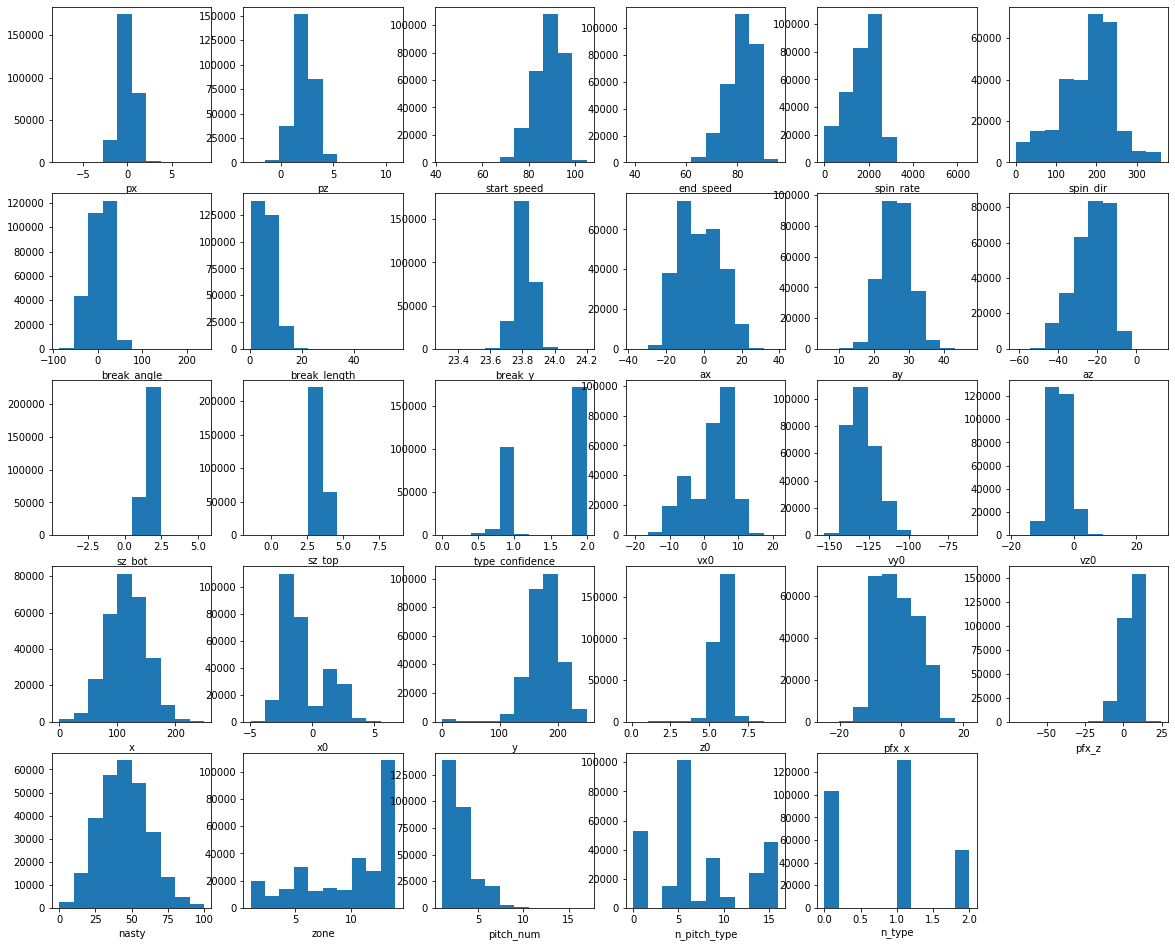

In [2]:
# Check distributions and outliers
plt.figure(figsize=(20,20))
grid = 1

for var in list(pitch_sample.columns):
    plt.subplot(6,6,grid)
    plt.hist(pitch_sample[var])
    plt.xlabel(var)
    grid+=1
    
for var in list(pitch_sample.columns):   
    print("For: " + var)
    q75, q25 = np.percentile(pitch_sample[var], [75 ,25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    ol = len(np.where((pitch_sample[var] > max_val) | (pitch_sample[var] < min_val))[0])
    print("Number of outliers is: {}".format(ol))
    print("Percentage of outliers is: {}".format(ol/pitch_sample.shape[0]))

For: px
Number of outliers is: 0
Percentage of outliers is: 0.0
For: pz
Number of outliers is: 4018
Percentage of outliers is: 0.014188253905477555
For: start_speed
Number of outliers is: 0
Percentage of outliers is: 0.0
For: end_speed


/Users/jkovach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Number of outliers is: 0
Percentage of outliers is: 0.0
For: spin_rate
Number of outliers is: 0
Percentage of outliers is: 0.0
For: spin_dir
Number of outliers is: 0
Percentage of outliers is: 0.0
For: break_angle
Number of outliers is: 0
Percentage of outliers is: 0.0
For: break_length
Number of outliers is: 6635
Percentage of outliers is: 0.023792362777054623
For: break_y
Number of outliers is: 0
Percentage of outliers is: 0.0
For: ax
Number of outliers is: 0
Percentage of outliers is: 0.0
For: ay
Number of outliers is: 0
Percentage of outliers is: 0.0
For: az
Number of outliers is: 0
Percentage of outliers is: 0.0
For: sz_bot
Number of outliers is: 4522
Percentage of outliers is: 0.016323200820130744
For: sz_top
Number of outliers is: 0
Percentage of outliers is: 0.0
For: type_confidence
Number of outliers is: 0
Percentage of outliers is: 0.0
For: vx0
Number of outliers is: 0
Percentage of outliers is: 0.0
For: vy0
Number of outliers is: 0
Percentage of outliers is: 0.0
For: vz0
Num

,pz,break_length,sz_bot,y,z0,pfx_z
count,268283.000000,268283.000000,268283.000000,268283.000000,268283.000000,268283.000000
mean,2.247861,6.353448,1.567457,176.936539,5.818014,5.292886
std,0.918846,2.679879,0.135117,26.607712,0.424828,4.941305
min,-2.461824,0.600000,-2.695369,0.000000,2.776034,-12.890000
25%,1.660000,4.300000,1.485755,161.450000,5.567000,2.501176
50%,2.256000,5.900000,1.570000,177.440000,5.839607,6.240000
75%,2.845104,7.800000,1.656182,193.550000,6.099000,9.008594
max,6.809972,16.700000,2.321428,249.990000,7.459000,18.420000


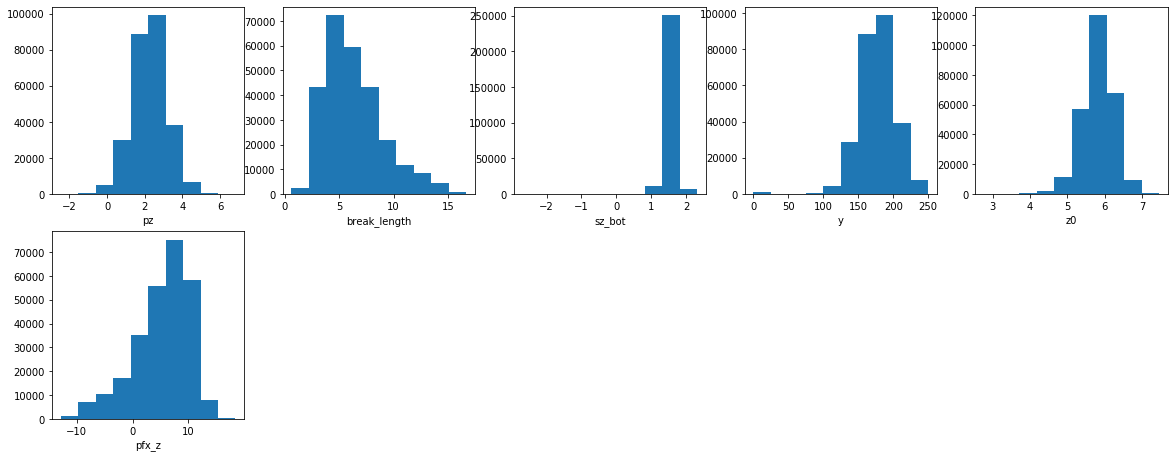

In [3]:
check = []

ol_cols = pitch_sample.drop(['n_pitch_type', 'n_type'],1)

for var in list(ol_cols.columns):
    print("For: " + var)
    q75, q25 = np.percentile(pitch_sample[var], [75 ,25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    
    ol = len(np.where((pitch_sample[var] > max_val) | (pitch_sample[var] < min_val))[0])
    otl_perc = ol/pitch_sample.shape[0]
    
    if otl_perc < 0.01:
        pitch_sample = pitch_sample[pitch_sample[var]<max_val]
        pitch_sample = pitch_sample[pitches[var]>min_val]
        ol = len(np.where((pitch_sample[var] > max_val) | (pitch_sample[var] < min_val))[0])
        otl_perc = ol/pitch_sample.shape[0]
    
    else:
        check.append(var)
    
    print("Number of outliers is: {}".format(ol))
    print("Percentage of outliers is: {}".format(otl_perc))

plt.figure(figsize=(20,20))
grid = 1

for var in check:
    plt.subplot(5,5,grid)
    plt.hist(pitch_sample[var])
    plt.xlabel(var)
    grid+=1

ol_check = pitch_sample[check]
ol_check.describe()

For: pz
Number of outliers is: 0
Percentage of outliers is: 0.0
For: break_length
Number of outliers is: 0
Percentage of outliers is: 0.0
For: sz_bot
Number of outliers is: 0
Percentage of outliers is: 0.0
For: y
Number of outliers is: 0
Percentage of outliers is: 0.0
For: z0
Number of outliers is: 0
Percentage of outliers is: 0.0
For: pfx_z
Number of outliers is: 0
Percentage of outliers is: 0.0


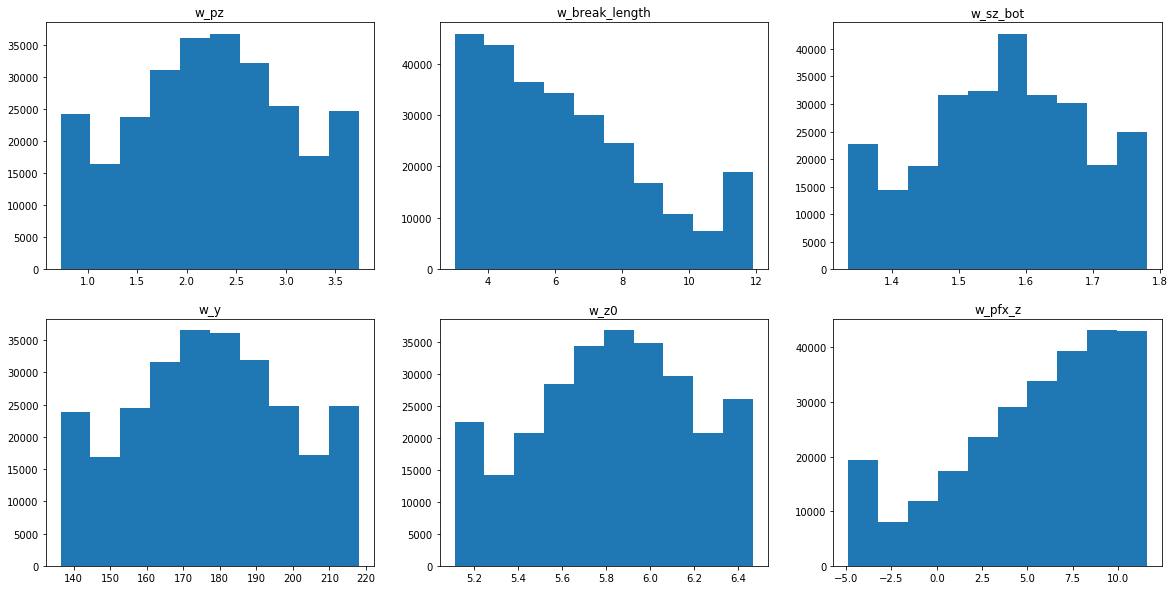

In [4]:
from scipy.stats.mstats import winsorize

plt.figure(figsize=(20,10))
grid = 1

for var in check:
    pitch_sample['w_' + var] = winsorize(pitch_sample[var],(0.05, 0.05))
    
    plt.subplot(2,3,grid)
    plt.hist(pitch_sample['w_' + var])
    plt.title('w_' + var)
    grid+=1
    
    print("For: " + var)
    q75, q25 = np.percentile(pitch_sample['w_' + var], [75 ,25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    
    ol = len(np.where((pitch_sample['w_' + var] > max_val) | (pitch_sample['w_' + var] < min_val))[0])
    otl_perc = ol/pitch_sample.shape[0]
    print("Number of outliers is: {}".format(ol))
    print("Percentage of outliers is: {}".format(otl_perc))

pz        0.394728
vz0       0.178421
y         0.331703
zone      1.000000
n_type    0.472885
w_pz      0.425073
w_y       0.405213
Name: zone, dtype: float64


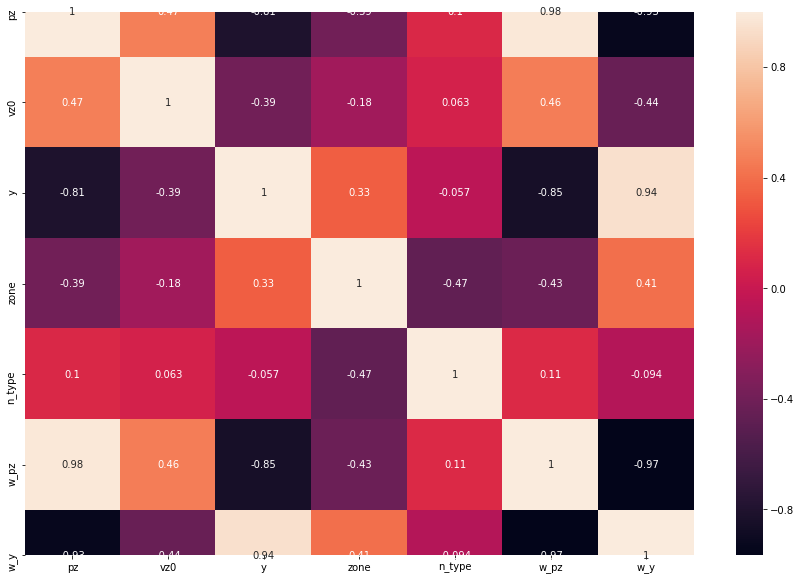

In [5]:
# Identify high correlation features
pcor = pitch_sample.corr()
cor_target = abs(pcor['zone'])
relevant_features = cor_target[cor_target>0.15]
rf_pitch = pitch_sample[list(relevant_features.index)]
print(relevant_features)

# Print Heatmap
plt.figure(figsize=(15,10))
rf_cor = rf_pitch.corr()
sns.heatmap(rf_cor, annot=True)
plt.show()

['vz0', 'n_type', 'w_pz', 'w_y']


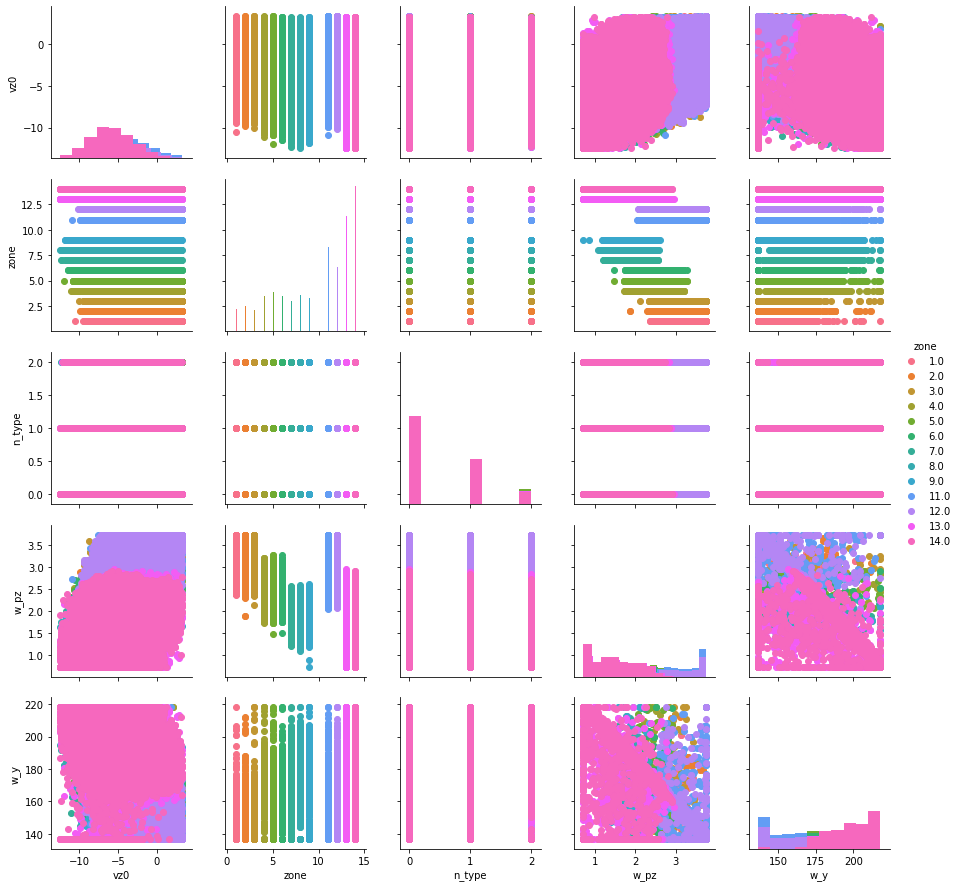

In [6]:
# Drop features with high intercorrelation
rf_pitch = rf_pitch.drop(['pz', 'y'], 1)
rel_feat = list(rf_pitch.columns)
rel_feat.remove('zone')
print(rel_feat)

# Visualize multivariate relationships 
g = sns.PairGrid(rf_pitch, hue='zone')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [ ]:
# Gaussian NB for Model #1
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

rf_pitch['norm_w_pz'] = normalize(np.array(rf_pitch['w_pz']).reshape(1,-1)).reshape(-1,1)
rf_pitch['norm_y'] = normalize(np.array(rf_pitch['y']).reshape(1,-1)).reshape(-1,1)
rf_pitch = rf



y = rf_pitch['is_fastball']
X = rf_pitch.drop(['is_fastball'],1)

gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

print('Number of mislabeled points out of {}: {}'.format(
    X.shape[0],
    (y != y_pred).sum()
))
print('Accuracy Rate: {}'.format((X.shape[0] - (y != y_pred).sum())/X.shape[0]))

# Confusion Matrix
confusion_matrix(y, y_pred)

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Check class imbalance
print(sorted(Counter(y).items()))

# Select random sample
rus = RandomUnderSampler(random_state=0)
X_rs, y_rs = rus.fit_resample(X,y)

X_tr, X_te, y_tr, y_te = train_test_split(X_rs, y_rs, test_size=.25, random_state=400)
print('Observations from training set {}'.format(X_tr.shape[0]))
print('Observations from test set {}'.format(X_te.shape[0]))

# Refit based on balanced training samples
gnb.fit(X_tr, y_tr)
y_te_pred = gnb.predict(X_te)

# Check model
print('Number of mislabeled points out of {}: {}'.format(
    X_te.shape[0],
    (y_te != y_te_pred).sum()
))    
print('Accuracy Rate: {}'.format((X_te.shape[0] - (y_te != y_te_pred).sum())/X_te.shape[0]))

# Confusion Matrix
print(confusion_matrix(y_te, y_te_pred))

# Check accuracy with test groups
print('Training R^2: ' + str(gnb.fit(X_tr, y_tr).score(X_tr, y_tr)))
print('Test R^2: ' + str(gnb.fit(X_te, y_te).score(X_te, y_te)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=10, weights='distance')
X = rf_pitch[['start_speed', 'az']]
y = rf_pitch['is_fastball']

Xrs, yrs = rus.fit_resample(X, y)
Xrs_train, Xrs_test, yrs_train, yrs_test = train_test_split(Xrs, yrs, test_size=0.25, random_state=400)
nbrs.fit(Xrs_train,yrs_train)

yrs_pred = nbrs.predict(Xrs_test)
print('Test Set Accuracy: {}'.format((Xrs_test.shape[0] - (yrs_test != yrs_pred).sum())/Xrs_test.shape[0]))
print('Training R^2: ' + str(gnb.fit(Xrs_train, yrs_train).score(Xrs_train, yrs_train)))
print('Test R^2: ' + str(gnb.fit(Xrs_test, yrs_test).score(Xrs_test, yrs_test)))

In [ ]:
# Decision tree model
from sklearn import tree
from IPython.display import Image
import pydotplus, graphviz
from sklearn.model_selection import cross_val_score

# Reset features and target
X = rf_pitch.drop('is_fastball', 1)
y = rf_pitch['is_fastball']
X_rs, y_rs = rus.fit_resample(X,y)

# Using a simple decision tree to determine fastball or offspeed
pitch_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
)
pitch_tree.fit(X_rs, y_rs)

dot_data = tree.export_graphviz(
    pitch_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Fastball', 'Not Fastball'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
print(cross_val_score(pitch_tree, X_rs, y_rs, cv=10))
Image(graph.create_png())
# Tree appears less accurate than simple NB

In [ ]:
# Forest to predict fastball or offspeed
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X_rs, y_rs, cv=10)

These models are reasonably accurate. They give us good explanatory power to demonstrate whether a pitch will be a fastball or offspeed pitch based on it's characteristics. There are two problems however; first, not all fastballs and offspeed pitches are the same. A curveball has different characteristics than a slider and a four-seam fastball generally has no break to it, where a two-seam fastball may. Secondly, these characteristics are only apparent after the pitch is thrown. This could be useful in scouting teams and players, specifically in determining what pitches a pitcher may have a proclivity toward throwing.

Because of these problems, they don't give us much in terms of predictive power, especially in terms of information that would be useful to a hitter. In order to maximize the usefulness of the model, we need to target a new dependent variable to determine the pitch type based on the situation (count, number of runners on, outs, etc.). With this new dependent, the model's primary usefulness would allow a batter to predict the most likely type of pitch being thrown in a given situation and correctly time their swing. Additionally, knowing what type of pitch a pitcher might throw, we could create additional models which could predict the continuous variable characteristics to expect of the pitch. 